## **BFSI CREDIT SCORE - CASE STUDY**

**Submitted By: Akash Kalita, Raman Sharma, and Vineeth M R**

Google Drive Importing Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### **Reading Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BFSI_Credit_Score/train.csv', encoding='Latin1')
testdata = pd.read_csv('/content/drive/MyDrive/BFSI_Credit_Score/test.csv', encoding='Latin1')

Head of the Dataset

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Shape of the Dataset

In [ ]:
df.shape

(100000, 28)

Information about the Dataset

In [ ]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Checking Null Values

In [ ]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Percentage of Null Values

In [ ]:
round(100*(df.isnull().sum()/len(df.index)), 2)

ID                           0.00
Customer_ID                  0.00
Month                        0.00
Name                         9.98
Age                          0.00
SSN                          0.00
Occupation                   0.00
Annual_Income                0.00
Monthly_Inhand_Salary       15.00
Num_Bank_Accounts            0.00
Num_Credit_Card              0.00
Interest_Rate                0.00
Num_of_Loan                  0.00
Type_of_Loan                11.41
Delay_from_due_date          0.00
Num_of_Delayed_Payment       7.00
Changed_Credit_Limit         0.00
Num_Credit_Inquiries         1.96
Credit_Mix                   0.00
Outstanding_Debt             0.00
Credit_Utilization_Ratio     0.00
Credit_History_Age           9.03
Payment_of_Min_Amount        0.00
Total_EMI_per_month          0.00
Amount_invested_monthly      4.48
Payment_Behaviour            0.00
Monthly_Balance              1.20
Credit_Score                 0.00
dtype: float64

## **Exploratory Data Analysis**

### **Data Cleaning**

**Dropping Redundant Columns**

In [ ]:
df = df.drop(['Name'], axis=1)
df = df.drop(['SSN'], axis=1)
df = df.drop(['Changed_Credit_Limit'], axis=1)
df = df.drop(['Num_Credit_Inquiries'], axis=1)
df = df.drop(['ID'], axis=1)
df = df.drop(['Month'], axis=1)
df = df.drop(['Credit_History_Age'], axis=1)

**Checking Null Values after Dropping Values**

In [ ]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Customer_ID                  0.00
Age                          0.00
Occupation                   0.00
Annual_Income                0.00
Monthly_Inhand_Salary       15.00
Num_Bank_Accounts            0.00
Num_Credit_Card              0.00
Interest_Rate                0.00
Num_of_Loan                  0.00
Type_of_Loan                11.41
Delay_from_due_date          0.00
Num_of_Delayed_Payment       7.00
Credit_Mix                   0.00
Outstanding_Debt             0.00
Credit_Utilization_Ratio     0.00
Payment_of_Min_Amount        0.00
Total_EMI_per_month          0.00
Amount_invested_monthly      4.48
Payment_Behaviour            0.00
Monthly_Balance              1.20
Credit_Score                 0.00
dtype: float64

**Shape after Dropping**

In [ ]:
df.shape

(100000, 21)

**Visualisation Theme**

In [ ]:
sns.set_style('darkgrid')

**Analysing Age Column**

In [ ]:
df['Age'] = df['Age'].str.rstrip('_')
df['Age'] = df['Age'].str.lstrip('_')
df['Age'] = df['Age'].astype('int')
m = df['Age'].median()
for i in df['Age']:
  if i<0 or i>100:
    df['Age'] = df['Age'].replace(i,m)

df['Age'].fillna(df['Age'].median(), inplace = True)

**Analysis Occupation Column**

In [ ]:
for i in df.Occupation:
  if i=='_______':
    df.Occupation = df.Occupation.replace(i,np.nan)

df.Occupation = df.Occupation.fillna('Unknown')

In [ ]:
df['Occupation'].value_counts(normalize=True)

Unknown          0.07062
Lawyer           0.06575
Architect        0.06355
Engineer         0.06350
Scientist        0.06299
Mechanic         0.06291
Accountant       0.06271
Developer        0.06235
Media_Manager    0.06232
Teacher          0.06215
Entrepreneur     0.06174
Doctor           0.06087
Journalist       0.06085
Manager          0.05973
Musician         0.05911
Writer           0.05885
Name: Occupation, dtype: float64

**Analysis Annual_Income Column**

In [ ]:
df['Annual_Income'] = df['Annual_Income'].str.rstrip('_')
df['Annual_Income'] = df['Annual_Income'].astype('float')

In [ ]:
print(round(df['Annual_Income'].min(),2))
print(round(df['Annual_Income'].median(),2))
print(round(df['Annual_Income'].max(),2))

7005.93
37578.61
24198062.0


**Analysing Monthly_Inhand_Salary Column**

In [ ]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())

In [ ]:
df['Monthly_Inhand_Salary'].value_counts(normalize=True)

3093.745000    0.15009
6082.187500    0.00015
6769.130000    0.00015
6358.956667    0.00015
2295.058333    0.00015
                ...   
1087.546445    0.00001
3189.212103    0.00001
5640.117744    0.00001
7727.560450    0.00001
2443.654131    0.00001
Name: Monthly_Inhand_Salary, Length: 13235, dtype: float64

**Analysis Num_Bank_Accounts Column**

In [ ]:
print(round(df['Num_Bank_Accounts'].min(),2))
print(round(df['Num_Bank_Accounts'].median(),2))
print(round(df['Num_Bank_Accounts'].max(),2))

-1
6.0
1798


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb1a121f6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb196b7d2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb198b8e0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb196b7dc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb196b7d820>],
 'means': []}

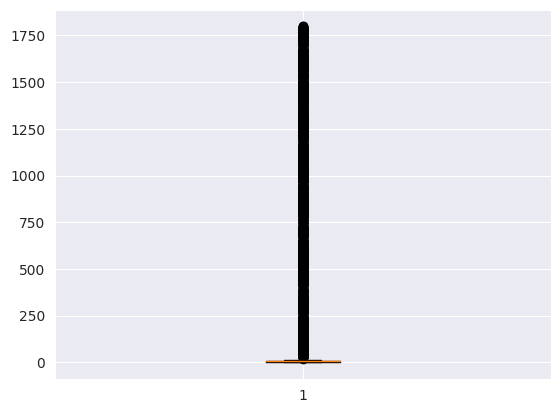

In [ ]:
plt.boxplot(df['Num_Bank_Accounts'])

**Observation:** The column Num_Bank_Accounts has high number of values that are impractical in the real world. Therefore, dropping the Num_Bank_Accounts column.

In [ ]:
df = df.drop(['Num_Bank_Accounts'], axis=1)

**Analysing Num_Credit_Card Column**

In [ ]:
print(round(df['Num_Credit_Card'].min(),2))
print(round(df['Num_Credit_Card'].median(),2))
print(round(df['Num_Credit_Card'].max(),2))

0
5.0
1499


In [ ]:
df['Num_Credit_Card'].value_counts()

5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: Num_Credit_Card, Length: 1179, dtype: int64

**Observation:** The column Num_Credit_Card has high number of values that are impractical in the real world. Therefore, dropping the Num_Credit_Card column.

In [ ]:
df = df.drop(['Num_Credit_Card'], axis=1)

Analysing Interest_Rate Column

In [ ]:
print(round(df['Interest_Rate'].min()))
print(round(df['Interest_Rate'].median()))
print(round(df['Interest_Rate'].max()))

1
13
5797


**Observation:** The column Interest_Rate has high number of values that are impractical in the real world. Therefore, dropping the Interest_Rate column.

In [ ]:
df = df.drop(['Interest_Rate'], axis=1)

**Analysis Num_of_Loan Column**

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.rstrip('_')
df['Num_of_Loan'] = df['Num_of_Loan'].astype('int')

In [ ]:
print(round(df['Num_of_Loan'].min()))
print(round(df['Num_of_Loan'].median()))
print(round(df['Num_of_Loan'].max()))

-100
3
1496


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb198af10a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb1989e0a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb198af1a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb1989e0e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb198ca8e80>],
 'means': []}

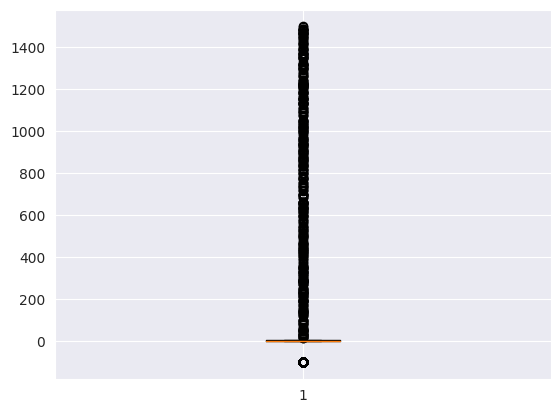

In [ ]:
plt.boxplot(df['Num_of_Loan'])

**Observation:** The column Num_of_Loan has high number of values that are impractical in the real world. Therefore, dropping the Num_of_Loan column.

In [ ]:
df = df.drop(['Num_of_Loan'], axis=1)

**Analysing Type_of_Loan Column**

In [ ]:
df['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

**Observation:** The column Type_of_Loan has high number of unorganised values. Therefore, dropping the column.

In [ ]:
df = df.drop(['Type_of_Loan'], axis=1)

**Analysing Delay_from_due_date Column**

In [ ]:
df['Delay_from_due_date']

0         3
1        -1
2         3
3         5
4         6
         ..
99995    23
99996    18
99997    27
99998    20
99999    18
Name: Delay_from_due_date, Length: 100000, dtype: int64

Replacing negative values with 0 as number of delayed days cannot be negative.

In [ ]:
for i in df['Delay_from_due_date']:
  if i<0:
    df['Delay_from_due_date'] = df['Delay_from_due_date'].replace(i, 0)

In [ ]:
df['Delay_from_due_date']

0         3
1         0
2         3
3         5
4         6
         ..
99995    23
99996    18
99997    27
99998    20
99999    18
Name: Delay_from_due_date, Length: 100000, dtype: int64

**Analysing Num_of_Delayed_Payment Column**

In [ ]:
df['Num_of_Delayed_Payment'].value_counts()

19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.rstrip('_')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.lstrip('_')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('float')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())

**Analysing Credit_Mix Column**

In [ ]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [ ]:
for i in df.Credit_Mix:
  if i=='_':
    df.Credit_Mix = df.Credit_Mix.replace(i,np.nan)
df['Credit_Mix'] = df['Credit_Mix'].fillna('Unknown')

In [ ]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
Unknown     20195
Bad         18989
Name: Credit_Mix, dtype: int64

**Analysing Outstanding_Debt Column**

In [ ]:
df['Outstanding_Debt'].value_counts()

1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [ ]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.rstrip('_')
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.lstrip('_')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype('float')

**Analysing Credit_Utilization_Ratio Column**

In [ ]:
df['Credit_Utilization_Ratio']

0        26.822620
1        31.944960
2        28.609352
3        31.377862
4        24.797347
           ...    
99995    34.663572
99996    40.565631
99997    41.255522
99998    33.638208
99999    34.192463
Name: Credit_Utilization_Ratio, Length: 100000, dtype: float64

**Analysing Credit_Utilization_Ratio Column**

In [ ]:
df['Credit_Utilization_Ratio']

0        26.822620
1        31.944960
2        28.609352
3        31.377862
4        24.797347
           ...    
99995    34.663572
99996    40.565631
99997    41.255522
99998    33.638208
99999    34.192463
Name: Credit_Utilization_Ratio, Length: 100000, dtype: float64

**Analysing Payment_of_Min_Amount Column**

In [ ]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM','No')

In [ ]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

**Analysing Total_EMI_per_month Column**

In [ ]:
print(round(df['Total_EMI_per_month'].min()))
print(round(df['Total_EMI_per_month'].median()))
print(round(df['Total_EMI_per_month'].max()))

0
69
82331


**Analysing Amount_invested_monthly Column**

In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.rstrip('_')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.lstrip('_')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())

**Analysing Payment_Behaviour Column**

In [ ]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [ ]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', 'Unknown')

In [ ]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Unknown                              7600
Name: Payment_Behaviour, dtype: int64

**Analysing Monthly_Balance Column**

In [ ]:
df['Monthly_Balance'].value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].str.rstrip('_')
df['Monthly_Balance'] = df['Monthly_Balance'].str.lstrip('_')
df['Monthly_Balance'] = df['Monthly_Balance'].astype('float')
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].median())

for i in df['Monthly_Balance']:
  if i<0:
    df['Monthly_Balance'] = df['Monthly_Balance'].replace(i,0)

In [ ]:
print(round(df['Monthly_Balance'].min()))
print(round(df['Monthly_Balance'].median()))
print(round(df['Monthly_Balance'].max()))

0
336
1602


**Analysing Credit_Score Columns**

In [ ]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
df['Credit_Score'].value_counts(normalize = True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

Changing categorical values of Credit_Score to numerical values (0 means 'Poor' and 1 means 'Good_and_Above')

In [ ]:
df['Credit_Score'].replace('Poor',0, inplace = True)
df['Credit_Score'].replace('Standard',1, inplace = True)
df['Credit_Score'].replace('Good',1, inplace = True)

### **Reindexing**

In [ ]:
df.reset_index()

,index,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,7.0,Unknown,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,1,CUS_0xd40,23,Scientist,19114.12,3093.745000,0,14.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,1
2,2,CUS_0xd40,33,Scientist,19114.12,3093.745000,3,7.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,1
3,3,CUS_0xd40,23,Scientist,19114.12,3093.745000,5,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,1
4,4,CUS_0xd40,23,Scientist,19114.12,1824.843333,6,14.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,CUS_0x942c,25,Mechanic,39628.99,3359.415833,23,7.0,Unknown,502.38,34.663572,No,35.104023,60.971333,High_spent_Large_value_payments,336.449266,0
99996,99996,CUS_0x942c,25,Mechanic,39628.99,3359.415833,18,7.0,Unknown,502.38,40.565631,No,35.104023,54.185950,High_spent_Medium_value_payments,336.449266,0
99997,99997,CUS_0x942c,25,Mechanic,39628.99,3359.415833,27,6.0,Good,502.38,41.255522,No,35.104023,24.028477,High_spent_Large_value_payments,336.449266,0
99998,99998,CUS_0x942c,25,Mechanic,39628.99,3359.415833,20,14.0,Good,502.38,33.638208,No,35.104023,251.672582,Low_spent_Large_value_payments,336.449266,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Delay_from_due_date       100000 non-null  int64  
 6   Num_of_Delayed_Payment    100000 non-null  float64
 7   Credit_Mix                100000 non-null  object 
 8   Outstanding_Debt          100000 non-null  float64
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Payment_of_Min_Amount     100000 non-null  object 
 11  Total_EMI_per_month       100000 non-null  float64
 12  Amount_invested_monthly   100000 non-null  float64
 13  Payment_Behaviour         100000 non-null  ob

In [ ]:
df.isna().sum()

Customer_ID                 0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# Machine Learning Segment

## **Converting Categorical Variable to Numerical Dummy Variables**

In [ ]:
dummy_dataset = pd.get_dummies(df[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour']], drop_first=True)
dummy_dataset.head()

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,...,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


## **Combining Numerical Variables of the 'New Dataset' with the 'Dummy Dataset' containing categorical variables converted to numeric values.**

In [ ]:
df = pd.concat([df[['Customer_ID', 'Credit_Score', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 
                                      'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
                                      'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']], dummy_dataset], axis=1)
df.head()

,Customer_ID,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,...,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
0,CUS_0xd40,1,23,19114.12,1824.843333,3,7.0,809.98,26.822620,49.574949,...,0,0,1,0,0,1,0,0,0,0
1,CUS_0xd40,1,23,19114.12,3093.745000,0,14.0,809.98,31.944960,49.574949,...,1,0,0,0,0,0,1,0,0,0
2,CUS_0xd40,1,33,19114.12,3093.745000,3,7.0,809.98,28.609352,49.574949,...,1,0,0,0,0,0,0,1,0,0
3,CUS_0xd40,1,23,19114.12,3093.745000,5,4.0,809.98,31.377862,49.574949,...,1,0,0,0,0,0,0,0,1,0
4,CUS_0xd40,1,23,19114.12,1824.843333,6,14.0,809.98,24.797347,49.574949,...,1,0,0,0,1,0,0,0,0,0


## **X and y Preparation**

In [ ]:
y = df['Credit_Score']
X = df.drop(['Credit_Score', 'Customer_ID'], axis=1)

## **Splitting the y and X Datasets into Train and Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=100)

In [ ]:
num_var_list = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 
                                      'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
                                      'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']

In [ ]:
scaler = StandardScaler()
X_train[num_var_list] = scaler.fit_transform(X_train[num_var_list])
X_train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,...,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
78763,0.442614,-0.106470,-0.796892,-1.148419,-0.136991,-0.031368,0.558434,-0.169573,-0.276591,-0.213858,...,0,0,1,0,1,0,0,0,0,0
71947,1.007973,-0.109463,-0.865934,0.402216,-0.039250,0.981249,0.164849,-0.158275,-0.293510,-0.598491,...,0,0,0,1,1,0,0,0,0,0
21641,-1.818822,-0.111736,-0.979810,0.267379,-0.053213,0.957884,-0.681443,-0.163636,-0.259738,-0.770855,...,0,1,0,1,0,0,1,0,0,0
61078,0.254161,-0.109511,-0.841481,1.750595,-0.034596,0.312240,1.220550,-0.159344,-0.257663,-0.813749,...,0,0,0,1,0,1,0,0,0,0
14736,0.065708,-0.062510,0.934384,2.559622,-0.090448,0.434320,1.010624,-0.131835,-0.084771,-1.047448,...,0,1,0,1,0,1,0,0,0,0


## **Model Building**

## **Model 1**

In [ ]:
model_1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model_1 = model_1.fit()
print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Credit_Score   No. Observations:                70000
Model:                            GLM   Df Residuals:                    69964
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35730.
Date:                Fri, 14 Apr 2023   Deviance:                       71459.
Time:                        19:01:35   Pearson chi2:                 6.82e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1665
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

## **Model 2 (Using RFE)**

**RFE Feature Selection**

In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)

**Ranking of Variables by RFE**

In [ ]:
rfe.support_

array([ True, False,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('Annual_Income', False, 14),
 ('Monthly_Inhand_Salary', True, 1),
 ('Delay_from_due_date', True, 1),
 ('Num_of_Delayed_Payment', False, 17),
 ('Outstanding_Debt', True, 1),
 ('Credit_Utilization_Ratio', False, 21),
 ('Total_EMI_per_month', False, 20),
 ('Amount_invested_monthly', False, 18),
 ('Monthly_Balance', False, 3),
 ('Occupation_Architect', False, 7),
 ('Occupation_Developer', False, 13),
 ('Occupation_Doctor', True, 1),
 ('Occupation_Engineer', False, 10),
 ('Occupation_Entrepreneur', True, 1),
 ('Occupation_Journalist', False, 12),
 ('Occupation_Lawyer', False, 5),
 ('Occupation_Manager', False, 8),
 ('Occupation_Mechanic', False, 9),
 ('Occupation_Media_Manager', True, 1),
 ('Occupation_Musician', False, 6),
 ('Occupation_Scientist', False, 16),
 ('Occupation_Teacher', False, 15),
 ('Occupation_Unknown', False, 11),
 ('Occupation_Writer', True, 1),
 ('Credit_Mix_Good', False, 19),
 ('Credit_Mix_Standard', True, 1),
 ('Credit_Mix_Unknown', True, 1),
 ('Pa

**Variables Selected by RFE**

In [ ]:
cols_1 = X_train.columns[rfe.support_]
cols_1

Index(['Age', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
       'Outstanding_Debt', 'Occupation_Doctor', 'Occupation_Entrepreneur',
       'Occupation_Media_Manager', 'Occupation_Writer', 'Credit_Mix_Standard',
       'Credit_Mix_Unknown', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Payment_Behaviour_Unknown'],
      dtype='object')

### **Variables Not Selected by RFE**

In [ ]:
X_train.columns[~rfe.support_]

Index(['Annual_Income', 'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Engineer',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Musician', 'Occupation_Scientist',
       'Occupation_Teacher', 'Occupation_Unknown', 'Credit_Mix_Good',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments'],
      dtype='object')

In [ ]:
model_2_rfe = sm.GLM(y_train,(sm.add_constant(X_train[cols_1])), family = sm.families.Binomial())
model_2_rfe = model_2_rfe.fit()
print(model_2_rfe.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Credit_Score   No. Observations:                70000
Model:                            GLM   Df Residuals:                    69984
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35755.
Date:                Fri, 14 Apr 2023   Deviance:                       71510.
Time:                        19:01:47   Pearson chi2:                 6.83e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1659
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

# **Model 3 (Final Model)**

In [ ]:
X_train_sm = sm.add_constant(X_train[cols_1])
model_3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
final_model = model_3.fit()
print(final_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Credit_Score   No. Observations:                70000
Model:                            GLM   Df Residuals:                    69984
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35755.
Date:                Fri, 14 Apr 2023   Deviance:                       71510.
Time:                        19:01:48   Pearson chi2:                 6.83e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1659
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

## **VIFs of the Final Model**

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_1].values, i) for i in range(X_train[cols_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Payment_of_Min_Amount_Yes,2.94
8,Credit_Mix_Standard,2.24
3,Outstanding_Debt,1.85
2,Delay_from_due_date,1.59
13,Payment_Behaviour_Low_spent_Small_value_payments,1.39
9,Credit_Mix_Unknown,1.38
12,Payment_Behaviour_Low_spent_Medium_value_payments,1.16
1,Monthly_Inhand_Salary,1.13
11,Payment_Behaviour_Low_spent_Large_value_payments,1.13
14,Payment_Behaviour_Unknown,1.09


## **Predicted Probabilities**

In [ ]:
y_train_pred = final_model.predict(X_train_sm)
y_train_pred

78763    0.890827
71947    0.595150
21641    0.565656
61078    0.408748
14736    0.483534
           ...   
65615    0.801651
77655    0.860877
79683    0.348295
56088    0.780689
38408    0.423720
Length: 70000, dtype: float64

##**Dataframe with Customer_ID, Credit_Score, and Predicted Probabilities**

In [ ]:
final_y_train_pred = pd.DataFrame({'Credit_Score':y_train.values, 'Probability':y_train_pred})
final_y_train_pred['Customer_ID'] = y_train.index
final_y_train_pred = final_y_train_pred[['Customer_ID', 'Credit_Score', 'Probability']]
final_y_train_pred.head()

,Customer_ID,Credit_Score,Probability
78763,78763,1,0.890827
71947,71947,0,0.595150
21641,21641,0,0.565656
61078,61078,0,0.408748
14736,14736,0,0.483534


## **Prediction**

In [ ]:
final_y_train_pred['Prediction'] = final_y_train_pred.Probability.map(lambda x: 1 if x>0.6 else 0)
final_y_train_pred.head()

,Customer_ID,Credit_Score,Probability,Prediction
78763,78763,1,0.890827,1
71947,71947,0,0.595150,0
21641,21641,0,0.565656,0
61078,61078,0,0.408748,0
14736,14736,0,0.483534,0


## **Confusion Matrix**

In [ ]:
confusion_matrx = metrics.confusion_matrix(final_y_train_pred.Credit_Score, final_y_train_pred.Prediction)
print(confusion_matrx)

[[10190 10058]
 [ 6663 43089]]


In [ ]:
#Here: 
#Predicted    Not_Poor      Poor
#Actual
#Not_Poor      10190       10058
#Poor          6663        43089 

## **Model Accuracy**

In [ ]:
metrics.accuracy_score(final_y_train_pred.Credit_Score, final_y_train_pred.Prediction)

0.7611285714285714

## **Metrics Beyond Accuracy**

In [ ]:
TP = confusion_matrx[1,1] #True Positives
TN = confusion_matrx[0,0] #True Negatives
FP = confusion_matrx[0,1] #False Positives
FN = confusion_matrx[1,0] #False Negatives

### **Sensitivity**

In [ ]:
sensitivity = TP/float(TP + FN)
print(sensitivity)

0.8660757356488181


### **Specificity**

In [ ]:
specificity = TN/float(TN + FP)
print(specificity)

0.5032595811932042


**False Positive Rate**

In [ ]:
FPR = FP/float(TN + FP)
print(FPR)

0.49674041880679576


**Positive Predictive Value**

In [ ]:
PPV = TP/float(TP + FP)
print(PPV)

0.8107513123976894


**Negative Predictive Value**

In [ ]:
NPV = TN/float(TN + FN)
print(NPV)

0.6046401234201626


## **ROC Curve**

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( final_y_train_pred.Credit_Score, final_y_train_pred.Probability, drop_intermediate = False )

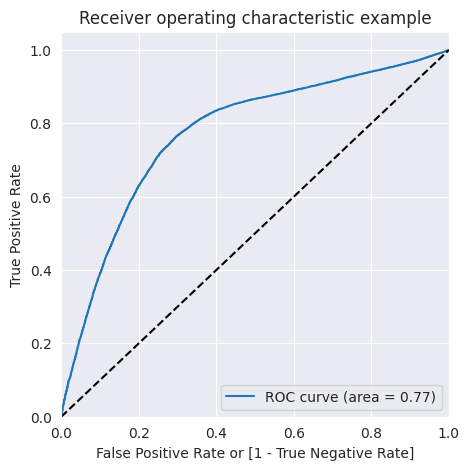

In [ ]:
draw_roc(final_y_train_pred.Credit_Score, final_y_train_pred.Probability)

## **Finding Optimal Cut-off**

In [ ]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    final_y_train_pred[i]= final_y_train_pred.Probability.map(lambda x: 1 if x > i else 0)
final_y_train_pred.head()

,Customer_ID,Credit_Score,Probability,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
78763,78763,1,0.890827,1,1,1,1,1,1,1,1,1,1,0
71947,71947,0,0.595150,0,1,1,1,1,1,1,0,0,0,0
21641,21641,0,0.565656,0,1,1,1,1,1,1,0,0,0,0
61078,61078,0,0.408748,0,1,1,1,1,1,0,0,0,0,0
14736,14736,0,0.483534,0,1,1,1,1,1,0,0,0,0,0


## **Probabilty, Accuracy, Sensitivity, and Specificity at different cut-offs**

In [ ]:
cutoff = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(final_y_train_pred.Credit_Score, final_y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.710743     1.000000     0.000000
0.1          0.1  0.710743     1.000000     0.000000
0.2          0.2  0.711100     0.992704     0.019162
0.3          0.3  0.716471     0.964665     0.106628
0.4          0.4  0.731100     0.930495     0.241160
0.5          0.5  0.745900     0.894698     0.380284
0.6          0.6  0.761129     0.866076     0.503260
0.7          0.7  0.762157     0.810500     0.643372
0.8          0.8  0.659143     0.594830     0.817167
0.9          0.9  0.334743     0.069465     0.986567


## **Visualisation of the relation between the metrics**

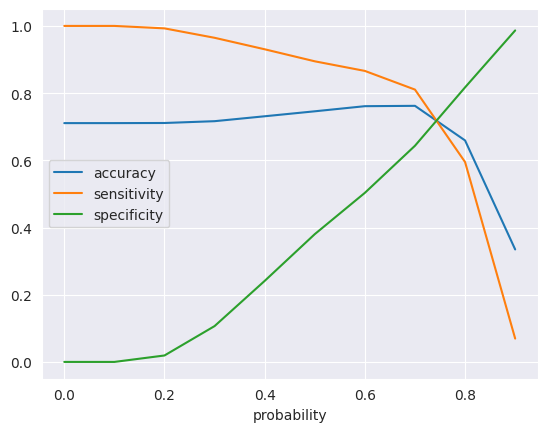

In [ ]:
cutoff.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()

## **Precision and Recall**

**Precision**

In [ ]:
precision = TP/(TP+FP)
print(precision)

0.8107513123976894


**Recall**

In [ ]:
recall = TP/(TP+FN)
print(recall)

0.8660757356488181


## **Plotting Precision and Recall Tradeoff**

In [ ]:
final_y_train_pred.Credit_Score, final_y_train_pred.Prediction

(78763    1
 71947    0
 21641    0
 61078    0
 14736    0
         ..
 65615    1
 77655    1
 79683    1
 56088    1
 38408    1
 Name: Credit_Score, Length: 70000, dtype: int64,
 78763    1
 71947    0
 21641    0
 61078    0
 14736    0
         ..
 65615    1
 77655    1
 79683    0
 56088    1
 38408    0
 Name: Prediction, Length: 70000, dtype: int64)

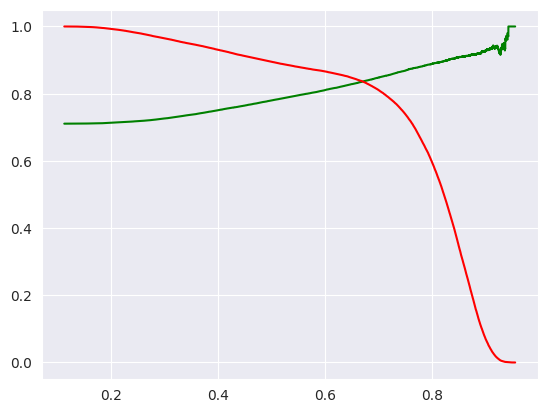

In [ ]:
p, r, thresholds = precision_recall_curve(final_y_train_pred.Credit_Score, final_y_train_pred.Probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **Changing Cutoff value as per the results from the Precision and Recall Tradeoff**

In [ ]:
final_y_train_pred['Prediction'] = final_y_train_pred.Probability.map(lambda x: 1 if x>0.7 else 0)
final_y_train_pred.head()

,Customer_ID,Credit_Score,Probability,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
78763,78763,1,0.890827,1,1,1,1,1,1,1,1,1,1,0
71947,71947,0,0.595150,0,1,1,1,1,1,1,0,0,0,0
21641,21641,0,0.565656,0,1,1,1,1,1,1,0,0,0,0
61078,61078,0,0.408748,0,1,1,1,1,1,0,0,0,0,0
14736,14736,0,0.483534,0,1,1,1,1,1,0,0,0,0,0


## **Test Set**

In [ ]:
num_var_list = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 
                                      'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
                                      'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']

X_test[num_var_list] = scaler.fit_transform(X_test[num_var_list])

X_test.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,...,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
22422,0.905665,-0.084083,0.387482,0.525440,-0.086363,-0.102591,0.715637,-0.147084,-0.220489,0.125450,...,0,1,0,1,1,0,0,0,0,0
25747,0.811896,-0.118049,-0.308675,-0.888034,-0.046402,-1.011255,-0.010511,-0.165602,-0.245344,-0.700110,...,0,1,0,1,0,0,0,0,1,0
13795,-0.219555,-0.120212,-1.041494,1.265831,-0.046402,-0.008032,-1.766015,-0.163833,-0.283948,-0.437913,...,0,0,0,1,0,0,0,0,1,0
68724,-0.782166,-0.103832,-0.445576,-0.686109,-0.046402,-0.408513,-0.735091,-0.158193,-0.257432,-0.262026,...,0,1,0,0,1,0,0,0,0,0
38923,1.093201,-0.120109,-1.145016,1.804298,-0.064163,2.062580,0.908765,-0.161436,-0.266215,-0.845113,...,0,0,1,1,0,0,0,0,1,0


## **Test Set with final selected Variables**

In [ ]:
X_test = X_test[cols_1]
X_test.head()

,Age,Monthly_Inhand_Salary,Delay_from_due_date,Outstanding_Debt,Occupation_Doctor,Occupation_Entrepreneur,Occupation_Media_Manager,Occupation_Writer,Credit_Mix_Standard,Credit_Mix_Unknown,Payment_of_Min_Amount_Yes,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
22422,0.905665,0.387482,0.525440,-0.102591,0,0,0,0,1,0,1,0,0,0,0
25747,0.811896,-0.308675,-0.888034,-1.011255,0,0,0,0,1,0,1,0,0,1,0
13795,-0.219555,-1.041494,1.265831,-0.008032,0,0,0,0,0,0,1,0,0,1,0
68724,-0.782166,-0.445576,-0.686109,-0.408513,0,0,0,0,1,0,0,0,0,0,0
38923,1.093201,-1.145016,1.804298,2.062580,0,0,0,0,0,1,1,0,0,1,0


**Adding Constant**

In [ ]:
X_test_sm = sm.add_constant(X_test)

## **Predictions on Test Set**

In [ ]:
y_test_pred = final_model.predict(X_test_sm)
y_test_pred

22422    0.757124
25747    0.846860
13795    0.418670
68724    0.883716
38923    0.298555
           ...   
3742     0.884700
49410    0.894634
51167    0.164794
32107    0.554015
96245    0.388986
Length: 30000, dtype: float64

**Converting y_test_pred to Data Frame**

In [ ]:
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df

,0
22422,0.757124
25747,0.846860
13795,0.418670
68724,0.883716
38923,0.298555
...,...
3742,0.884700
49410,0.894634
51167,0.164794
32107,0.554015


**Adding 'Customer_ID' to index**

In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Customer_ID'] = y_test_df.index

**Merging y_test_df and y_test_pred_df**

In [ ]:
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

final_y_pred = pd.concat([y_test_df, y_test_pred_df],axis=1)

final_y_pred.head()

,Credit_Score,Customer_ID,0
0,1,22422,0.757124
1,1,25747,0.846860
2,0,13795,0.418670
3,1,68724,0.883716
4,0,38923,0.298555


**Renaming column name '0' to 'Probability'**

In [ ]:
final_y_pred = final_y_pred.rename(columns={ 0 : 'Probability'})

final_y_pred.head()

,Credit_Score,Customer_ID,Probability
0,1,22422,0.757124
1,1,25747,0.846860
2,0,13795,0.418670
3,1,68724,0.883716
4,0,38923,0.298555


**Rearranging Columns**

In [ ]:
final_y_pred = final_y_pred[['Customer_ID', 'Credit_Score', 'Probability']]

final_y_pred.head()

,Customer_ID,Credit_Score,Probability
0,22422,1,0.757124
1,25747,1,0.846860
2,13795,0,0.418670
3,68724,1,0.883716
4,38923,0,0.298555


**Predicting on the Test Set**

In [ ]:
final_y_pred['Test_Prediction'] = final_y_pred.Probability.map(lambda x: 1 if x>0.7 else 0)
final_y_pred.head()

,Customer_ID,Credit_Score,Probability,Test_Prediction
0,22422,1,0.757124,1
1,25747,1,0.846860,1
2,13795,0,0.418670,0
3,68724,1,0.883716,1
4,38923,0,0.298555,0


**Accuracy of the Model**

In [ ]:
metrics.accuracy_score(final_y_pred.Credit_Score, final_y_pred.Test_Prediction)

0.7695666666666666

**Confusion Matrix**

In [ ]:
confusion_matrx_2 = metrics.confusion_matrix(final_y_pred.Credit_Score, final_y_pred.Test_Prediction)
confusion_matrx_2

array([[ 5722,  3028],
       [ 3885, 17365]])

In [ ]:
#Here: 
#Predicted     Not_Poor    Poor
#Actual
#Not_Poor       5722       3028
#Poor           3885       17365 

**Metrics Beyond Accuracy**

In [ ]:
TP = confusion_matrx_2[1,1] #True Positives
TN = confusion_matrx_2[0,0] #True Negatives
FP = confusion_matrx_2[0,1] #False Positives
FN = confusion_matrx_2[1,0] #False Negatives

### **Sensitivity**

In [ ]:
sensitivity = TP/float(TP + FN)
print(sensitivity)

0.8171764705882353


### **Specificity**

In [ ]:
specificity = TN/float(TN + FP)
print(specificity)

0.6539428571428572


**False Positive Rate**

In [ ]:
FPR = FP/float(TN + FP)
print(FPR)

0.34605714285714284


**Positive Predictive Value**

In [ ]:
PPV = TP/float(TP + FP)
print(PPV)

0.8515176776344824


**Negative Predictive Value**

In [ ]:
NPV = TN/float(TN + FN)
print(NPV)

0.5956073696263141


## **DEPLOYING THE FINAL MODEL ON THE TEST SET PROVIDED**

**Exploring the Test Set**

In [ ]:
testdata.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


## **Cleaning the data set and preparing it similar to the train data.**

**Dropping the Columns**

In [ ]:
testdata = testdata.drop(['Name'], axis=1)
testdata = testdata.drop(['SSN'], axis=1)
testdata = testdata.drop(['Changed_Credit_Limit'], axis=1)
testdata = testdata.drop(['Num_Credit_Inquiries'], axis=1)
testdata = testdata.drop(['ID'], axis=1)
testdata = testdata.drop(['Month'], axis=1)
testdata = testdata.drop(['Credit_History_Age'], axis=1)
testdata = testdata.drop(['Num_Credit_Card'], axis=1)
testdata = testdata.drop(['Interest_Rate'], axis=1)
testdata = testdata.drop(['Num_of_Loan'], axis=1)
testdata = testdata.drop(['Type_of_Loan'], axis=1)
testdata = testdata.drop(['Num_Bank_Accounts'], axis=1)

### **Cleaning data impurities**

**Age Column**

In [ ]:
testdata['Age'] = testdata['Age'].str.rstrip('_')
testdata['Age'] = testdata['Age'].str.lstrip('_')
testdata['Age'] = testdata['Age'].astype('int')
m = testdata['Age'].median()
for i in testdata['Age']:
  if i<0 or i>100:
    testdata['Age'] = testdata['Age'].replace(i,m)

testdata['Age'].fillna(testdata['Age'].median(), inplace = True)

**Occupation Column**

In [ ]:
for i in testdata.Occupation:
  if i=='_______':
    testdata.Occupation = testdata.Occupation.replace(i,np.nan)

testdata.Occupation = testdata.Occupation.fillna('Unknown')

**Annual_Income Column**

In [ ]:
testdata['Annual_Income'] = testdata['Annual_Income'].str.rstrip('_')
testdata['Annual_Income'] = testdata['Annual_Income'].astype('float')

**Monthly_Inhand_Salary Column**

In [ ]:
testdata['Monthly_Inhand_Salary'] = testdata['Monthly_Inhand_Salary'].fillna(testdata['Monthly_Inhand_Salary'].median())

**Delay_from_due_date Column**

In [ ]:
for i in testdata['Delay_from_due_date']:
  if i<0:
    testdata['Delay_from_due_date'] = testdata['Delay_from_due_date'].replace(i, 0)

**Num_of_Delayed_Payment Column**

In [ ]:
testdata['Num_of_Delayed_Payment'] = testdata['Num_of_Delayed_Payment'].str.rstrip('_')
testdata['Num_of_Delayed_Payment'] = testdata['Num_of_Delayed_Payment'].str.lstrip('_')
testdata['Num_of_Delayed_Payment'] = testdata['Num_of_Delayed_Payment'].astype('float')
testdata['Num_of_Delayed_Payment'] = testdata['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())

**Credit_Mix Column**

In [ ]:
for i in testdata.Credit_Mix:
  if i=='_':
    testdata.Credit_Mix = testdata.Credit_Mix.replace(i,np.nan)
testdata['Credit_Mix'] = testdata['Credit_Mix'].fillna('Unknown')

**Outstanding_Debt Column**

In [ ]:
testdata['Outstanding_Debt'] = testdata['Outstanding_Debt'].str.rstrip('_')
testdata['Outstanding_Debt'] = testdata['Outstanding_Debt'].str.lstrip('_')
testdata['Outstanding_Debt'] = testdata['Outstanding_Debt'].astype('float')

**Payment_of_Min_Amount Column**

In [ ]:
testdata['Payment_of_Min_Amount'] = testdata['Payment_of_Min_Amount'].replace('NM','No')

**Amount_invested_monthly Column**

In [ ]:
testdata['Amount_invested_monthly'] = testdata['Amount_invested_monthly'].str.rstrip('_')
testdata['Amount_invested_monthly'] = testdata['Amount_invested_monthly'].str.lstrip('_')
testdata['Amount_invested_monthly'] = testdata['Amount_invested_monthly'].astype('float')
testdata['Amount_invested_monthly'] = testdata['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())

**Payment_Behaviour Column**

In [ ]:
testdata['Payment_Behaviour'] = testdata['Payment_Behaviour'].replace('!@9#%8', 'Unknown')

**Monthly_Balance Column**

In [ ]:
testdata['Monthly_Balance'] = testdata['Monthly_Balance'].str.rstrip('_')
testdata['Monthly_Balance'] = testdata['Monthly_Balance'].str.lstrip('_')
testdata['Monthly_Balance'] = testdata['Monthly_Balance'].astype('float')
testdata['Monthly_Balance'] = testdata['Monthly_Balance'].fillna(df['Monthly_Balance'].median())

for i in testdata['Monthly_Balance']:
  if i<0:
    testdata['Monthly_Balance'] = testdata['Monthly_Balance'].replace(i,0)

**Viewing the Test dataset after cleaning**

In [ ]:
testdata.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,7.0,Good,809.98,35.030402,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,CUS_0xd40,24,Scientist,19114.12,1824.843333,3,9.0,Good,809.98,33.053114,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,CUS_0xd40,24,Scientist,19114.12,1824.843333,0,4.0,Good,809.98,33.811894,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,CUS_0xd40,24,Scientist,19114.12,3086.305000,4,5.0,Good,809.98,32.430559,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,CUS_0x21b1,28,Unknown,34847.84,3037.986667,3,1.0,Good,605.03,25.926822,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434


### **Creating new column 'Credit_Score(Predicted)' in the test set to store the Predicted Credit Scores ('Poor' and 'Good_and_Above')**

In [ ]:
testdata['Credit_Score'] = 0

In [ ]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               50000 non-null  object 
 1   Age                       50000 non-null  int64  
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  float64
 4   Monthly_Inhand_Salary     50000 non-null  float64
 5   Delay_from_due_date       50000 non-null  int64  
 6   Num_of_Delayed_Payment    50000 non-null  float64
 7   Credit_Mix                50000 non-null  object 
 8   Outstanding_Debt          50000 non-null  float64
 9   Credit_Utilization_Ratio  50000 non-null  float64
 10  Payment_of_Min_Amount     50000 non-null  object 
 11  Total_EMI_per_month       50000 non-null  float64
 12  Amount_invested_monthly   50000 non-null  float64
 13  Payment_Behaviour         50000 non-null  object 
 14  Monthl

In [ ]:
testdata.isna().sum()

Customer_ID                 0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

**Copy of the Test Data**

In [ ]:
original_testdata = testdata.copy()

In [ ]:
original_testdata.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,7.0,Good,809.98,35.030402,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,0
1,CUS_0xd40,24,Scientist,19114.12,1824.843333,3,9.0,Good,809.98,33.053114,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,0
2,CUS_0xd40,24,Scientist,19114.12,1824.843333,0,4.0,Good,809.98,33.811894,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446,0
3,CUS_0xd40,24,Scientist,19114.12,3086.305000,4,5.0,Good,809.98,32.430559,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873,0
4,CUS_0x21b1,28,Unknown,34847.84,3037.986667,3,1.0,Good,605.03,25.926822,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,0


**Creating a Dummy set for Categorical Variables**

In [ ]:
dummy_dataset1 = pd.get_dummies(testdata[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour']], drop_first=True)
dummy_dataset1.head()

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,...,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**Joining Categorical Variables and Numeric Variables**

In [ ]:
testdata = pd.concat([testdata[['Customer_ID', 'Credit_Score', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 
                                      'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
                                      'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']], dummy_dataset1], axis=1)

In [ ]:
testdata.head()

,Customer_ID,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,...,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
0,CUS_0xd40,0,23,19114.12,1824.843333,3,7.0,809.98,35.030402,49.574949,...,1,0,0,0,0,0,0,0,1,0
1,CUS_0xd40,0,24,19114.12,1824.843333,3,9.0,809.98,33.053114,49.574949,...,1,0,0,0,1,0,0,0,0,0
2,CUS_0xd40,0,24,19114.12,1824.843333,0,4.0,809.98,33.811894,49.574949,...,1,0,0,0,0,0,0,1,0,0
3,CUS_0xd40,0,24,19114.12,3086.305000,4,5.0,809.98,32.430559,49.574949,...,1,0,0,0,1,0,0,0,0,0
4,CUS_0x21b1,0,28,34847.84,3037.986667,3,1.0,605.03,25.926822,18.816215,...,1,0,0,0,0,0,0,0,0,0


**List of Numeric Variables**

In [ ]:
num_var_list1 = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 
                                      'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
                                      'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']

**Preparing X and y**

In [ ]:
y_test = testdata['Credit_Score']
X_test = testdata.drop(['Credit_Score', 'Customer_ID'], axis=1)

**Scaling Numeric Variables**

In [ ]:
X_test[num_var_list1] = scaler.fit_transform(X_test[num_var_list1])

X_test.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,...,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
0,-1.019489,-0.108894,-0.742722,-1.217537,-0.106277,-0.533485,0.538723,-0.167730,-0.190123,-1.015873,...,1,0,0,0,0,0,0,0,1,0
1,-0.925363,-0.108894,-0.742722,-1.217537,-0.096916,-0.533485,0.151489,-0.167730,-0.297205,-0.192003,...,1,0,0,0,1,0,0,0,0,0
2,-0.925363,-0.108894,-0.742722,-1.419710,-0.120318,-0.533485,0.300089,-0.167730,-0.234119,-0.647111,...,1,0,0,0,0,0,0,1,0,0
3,-0.925363,-0.108894,-0.315463,-1.150146,-0.115637,-0.533485,0.029568,-0.167730,-0.288438,-0.274857,...,1,0,0,0,1,0,0,0,0,0
4,-0.548858,-0.097257,-0.331828,-1.217537,-0.134359,-0.710911,-1.244130,-0.171308,-0.288139,0.390492,...,1,0,0,0,0,0,0,0,0,0


**Using Columns selected by RFE to predict credit scores on the test set.**

In [ ]:
X_test = X_test[cols_1]
X_test.head()

,Age,Monthly_Inhand_Salary,Delay_from_due_date,Outstanding_Debt,Occupation_Doctor,Occupation_Entrepreneur,Occupation_Media_Manager,Occupation_Writer,Credit_Mix_Standard,Credit_Mix_Unknown,Payment_of_Min_Amount_Yes,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
0,-1.019489,-0.742722,-1.217537,-0.533485,0,0,0,0,0,0,0,0,0,1,0
1,-0.925363,-0.742722,-1.217537,-0.533485,0,0,0,0,0,0,0,0,0,0,0
2,-0.925363,-0.742722,-1.419710,-0.533485,0,0,0,0,0,0,0,0,1,0,0
3,-0.925363,-0.315463,-1.150146,-0.533485,0,0,0,0,0,0,0,0,0,0,0
4,-0.548858,-0.331828,-1.217537,-0.710911,0,0,0,0,0,0,0,0,0,0,0


**Adding Constant**

In [ ]:
X_test_sm = sm.add_constant(X_test)

## **PREDICTIONS ON TEST SET**

**Predicting Probabilities on y_test_pred**

In [ ]:
y_test_pred = final_model.predict(X_test_sm)
y_test_pred

0        0.810865
1        0.856861
2        0.840891
3        0.857676
4        0.872313
           ...   
49995    0.407876
49996    0.737313
49997    0.757268
49998    0.789629
49999    0.787862
Length: 50000, dtype: float64

**Converting y_test_pred to a Data Frame**

In [ ]:
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df

,0
0,0.810865
1,0.856861
2,0.840891
3,0.857676
4,0.872313
...,...
49995,0.407876
49996,0.737313
49997,0.757268
49998,0.789629


**Adding Customer_ID as index**

In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Customer_ID'] = y_test_df.index

**Resetting Index and joining y_test_df and y_test_pred_df**

In [ ]:
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

final_y_pred = pd.concat([y_test_df, y_test_pred_df],axis=1)

final_y_pred.head()

,Credit_Score,Customer_ID,0
0,0,0,0.810865
1,0,1,0.856861
2,0,2,0.840891
3,0,3,0.857676
4,0,4,0.872313


**Renaming column named '0' to 'Probability'**

In [ ]:
final_y_pred = final_y_pred.rename(columns={ 0 : 'Probability'})

final_y_pred.head()

,Credit_Score,Customer_ID,Probability
0,0,0,0.810865
1,0,1,0.856861
2,0,2,0.840891
3,0,3,0.857676
4,0,4,0.872313


**Rearranging the columns**

In [ ]:
final_y_pred = final_y_pred[['Customer_ID', 'Credit_Score', 'Probability']]

final_y_pred.head()

,Customer_ID,Credit_Score,Probability
0,0,0,0.810865
1,1,0,0.856861
2,2,0,0.840891
3,3,0,0.857676
4,4,0,0.872313


**Assigning credit scores (Here: 0 means 'Poor' and 1 means 'Good_and_Above')**

In [ ]:
final_y_pred['Predicted_Credit_Score'] = final_y_pred.Probability.map(lambda x: 1 if x>0.7 else 0)
final_y_pred.head()

,Customer_ID,Credit_Score,Probability,Predicted_Credit_Score
0,0,0,0.810865,1
1,1,0,0.856861,1
2,2,0,0.840891,1
3,3,0,0.857676,1
4,4,0,0.872313,1


**Adding the Predicted_Credit_Score column values to the test set**

In [ ]:
original_testdata['Credit_Score'] = final_y_pred['Predicted_Credit_Score']

original_testdata['Credit_Score'].replace(0,'Poor', inplace = True)
original_testdata['Credit_Score'].replace(1,'Good_and_Above', inplace = True)

In [ ]:
original_testdata.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,7.0,Good,809.98,35.030402,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,Good_and_Above
1,CUS_0xd40,24,Scientist,19114.12,1824.843333,3,9.0,Good,809.98,33.053114,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,Good_and_Above
2,CUS_0xd40,24,Scientist,19114.12,1824.843333,0,4.0,Good,809.98,33.811894,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446,Good_and_Above
3,CUS_0xd40,24,Scientist,19114.12,3086.305000,4,5.0,Good,809.98,32.430559,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873,Good_and_Above
4,CUS_0x21b1,28,Unknown,34847.84,3037.986667,3,1.0,Good,605.03,25.926822,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,Good_and_Above


## **ANALYSING THE DEPENDENT AND INDEPENDENT VARIABLES**

### **Summary**

In [ ]:
original_testdata.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,33.831100,1.663342e+05,4017.693225,21.066760,29.707400,1426.220376,32.279581,1491.304305,618.684578,402.269114
std,10.624157,1.351965e+06,2952.479911,14.838924,213.664821,1155.134801,5.106238,8595.647887,2009.469634,212.629595
min,14.000000,7.005930e+03,303.645417,0.000000,-3.000000,0.230000,20.509652,0.000000,0.000000,0.000000
25%,25.000000,1.945333e+04,1794.304167,10.000000,9.000000,566.072500,28.061040,32.222388,77.031011,271.094542
50%,34.000000,3.757782e+04,3086.305000,18.000000,14.000000,1166.155000,32.280390,74.733349,135.925682,336.449266
75%,42.000000,7.281702e+04,5338.967500,28.000000,18.000000,1945.962500,36.468591,176.157491,255.917379,468.571215
max,95.000000,2.413726e+07,15204.633333,67.000000,4399.000000,4998.070000,48.540663,82398.000000,10000.000000,1606.518192


**Number of customers predicted to have 'Poor' and 'Good_and_Above' credit score**

In [ ]:
original_testdata['Credit_Score'].value_counts()

Good_and_Above    33981
Poor              16019
Name: Credit_Score, dtype: int64

In [ ]:
original_testdata['Credit_Score'].value_counts(normalize=True)

Good_and_Above    0.67962
Poor              0.32038
Name: Credit_Score, dtype: float64

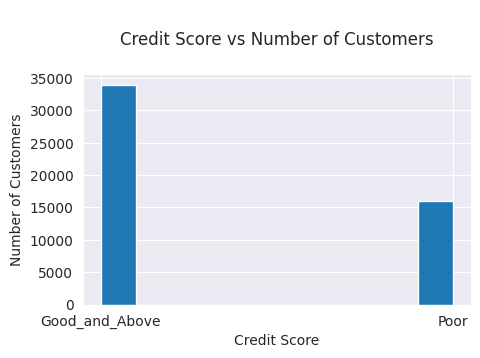

In [ ]:
plt.figure(figsize=[5,3])
original_testdata['Credit_Score'].hist()
plt.title('\nCredit Score vs Number of Customers\n')
plt.ylabel('Number of Customers')
plt.xlabel('Credit Score')
plt.show()

### **Analysing Customer Age**

Text(0.5, 0, 'Age Group')

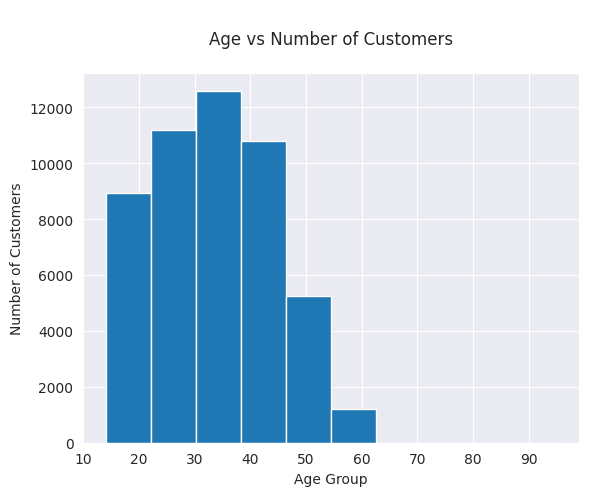

In [ ]:
original_testdata['Age'].hist()
plt.title('\nAge vs Number of Customers\n')
plt.ylabel('Number of Customers')
plt.xlabel('Age Group')

### **Credit Score vs Age**

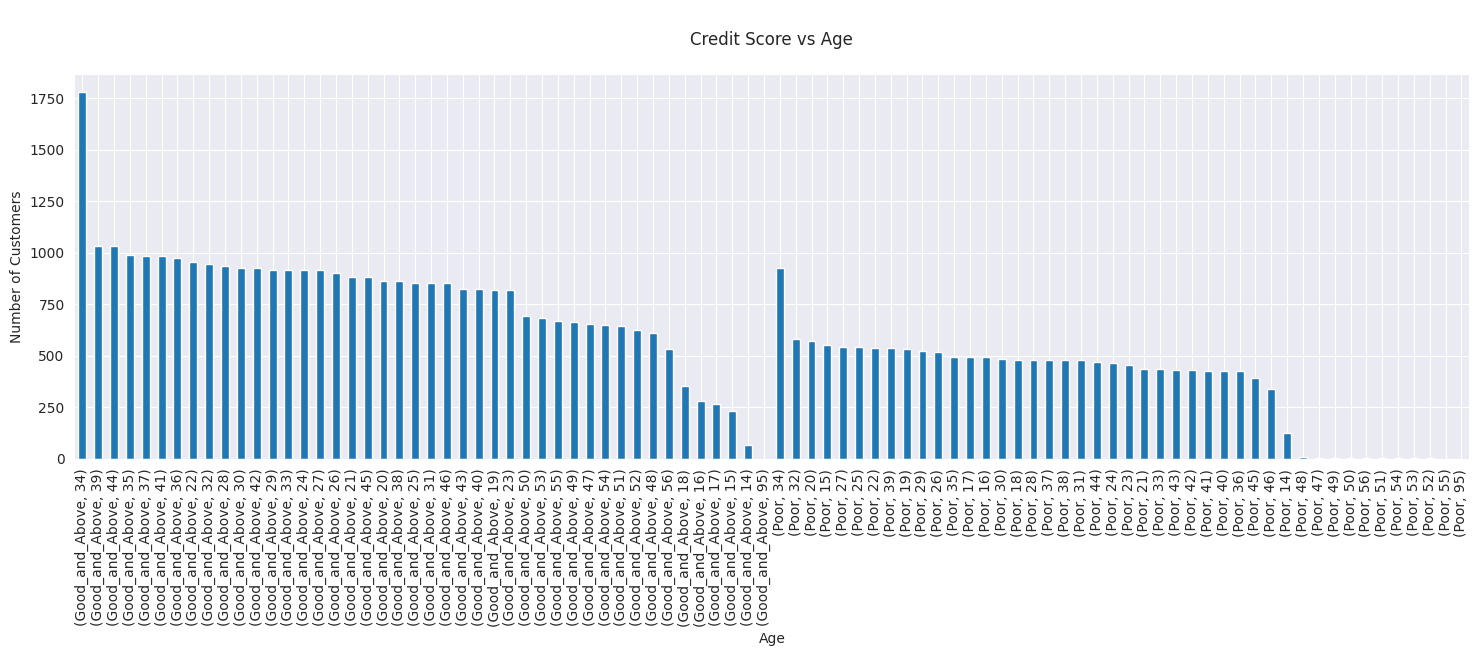

In [ ]:
plt.figure(figsize=[18,5])
original_testdata.groupby(['Credit_Score'])['Age'].value_counts().plot.bar()
plt.title('\nCredit Score vs Age\n')
plt.ylabel('Number of Customers')
plt.xlabel('Age')
plt.show()

### **Credit Score vs Average Annual Income**

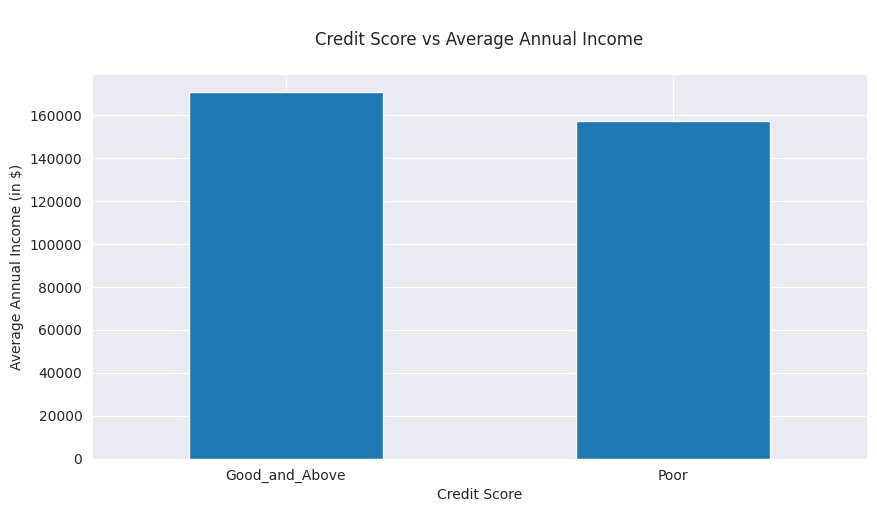

In [ ]:
plt.figure(figsize=[10,5])
original_testdata.groupby(['Credit_Score'])['Annual_Income'].mean().plot.bar()
plt.title('\nCredit Score vs Average Annual Income\n')
plt.ylabel('Average Annual Income (in $)')
plt.xlabel('Credit Score')
plt.xticks(rotation = 360)
plt.show()

### **Credit Score vs Average Monthly Inhand Salary**

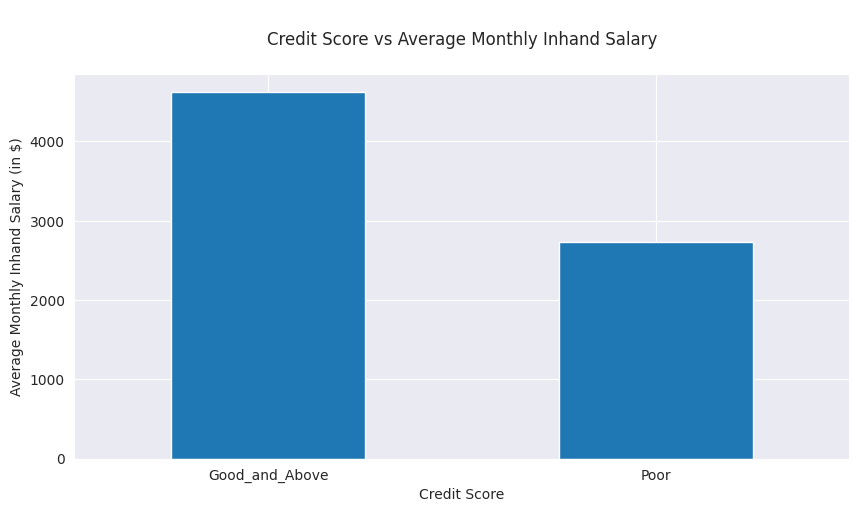

In [ ]:
plt.figure(figsize=[10,5])
original_testdata.groupby(['Credit_Score'])['Monthly_Inhand_Salary'].mean().plot.bar()
plt.title('\nCredit Score vs Average Monthly Inhand Salary\n')
plt.ylabel('Average Monthly Inhand Salary (in $)')
plt.xlabel('Credit Score')
plt.xticks(rotation = 360)
plt.show()

### **Credit Score vs Delay from Due Date**

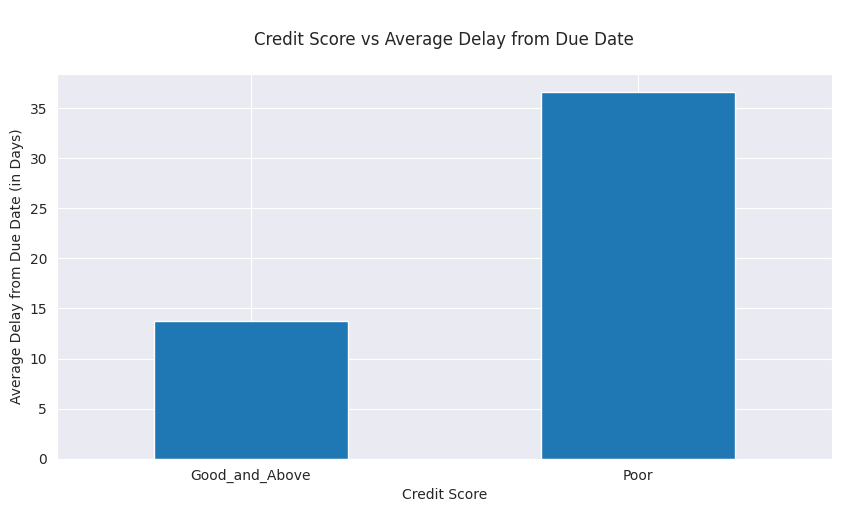

In [ ]:
plt.figure(figsize=[10,5])
original_testdata.groupby(['Credit_Score'])['Delay_from_due_date'].mean().plot.bar()
plt.title('\nCredit Score vs Average Delay from Due Date\n')
plt.ylabel('Average Delay from Due Date (in Days)')
plt.xlabel('Credit Score')
plt.xticks(rotation = 360)
plt.show()

### **Credit Score vs Number of Delayed Payments**

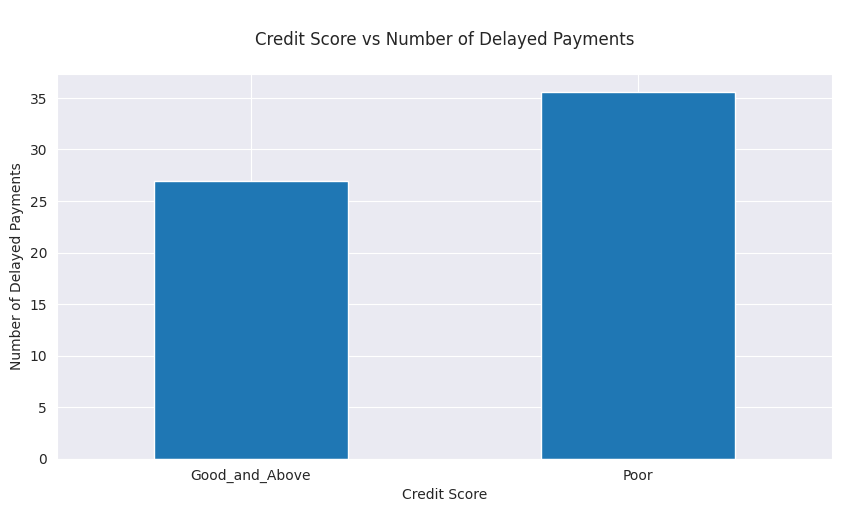

In [ ]:
plt.figure(figsize=[10,5])
original_testdata.groupby(['Credit_Score'])['Num_of_Delayed_Payment'].mean().plot.bar()
plt.title('\nCredit Score vs Number of Delayed Payments\n')
plt.ylabel('Number of Delayed Payments')
plt.xlabel('Credit Score')
plt.xticks(rotation = 360)
plt.show()

**Credit Score vs Credit Mix**

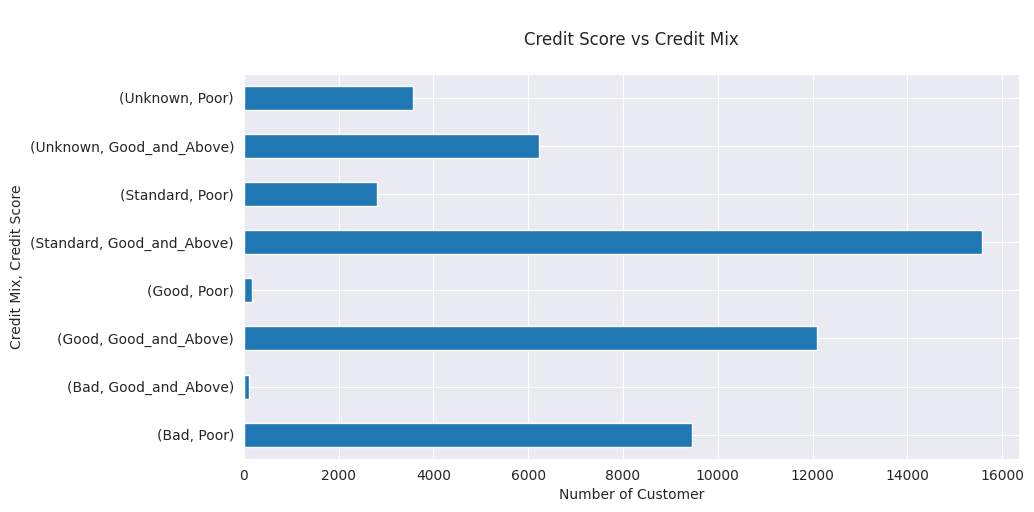

In [ ]:
plt.figure(figsize=[10,5])
original_testdata.groupby(['Credit_Mix'])['Credit_Score'].value_counts().plot.barh()
plt.title('\nCredit Score vs Credit Mix\n')
plt.ylabel('Credit Mix, Credit Score')
plt.xlabel('Number of Customer')
plt.show()

**Credit Score vs Outstanding Debt**

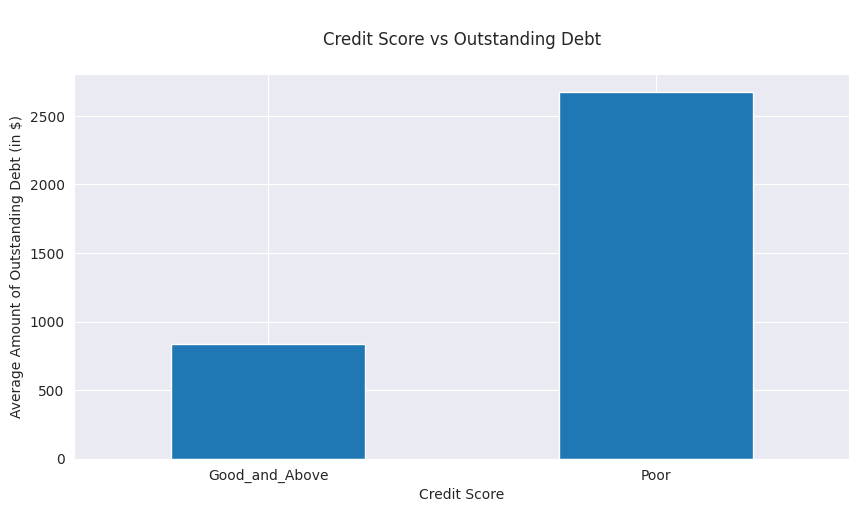

In [ ]:
plt.figure(figsize=[10,5])
original_testdata.groupby(['Credit_Score'])['Outstanding_Debt'].mean().plot.bar()
plt.title('\nCredit Score vs Outstanding Debt\n')
plt.ylabel('Average Amount of Outstanding Debt (in $)')
plt.xlabel('Credit Score')
plt.xticks(rotation = 360)
plt.show()

**Credit Score vs Credit Utilization Ratio**

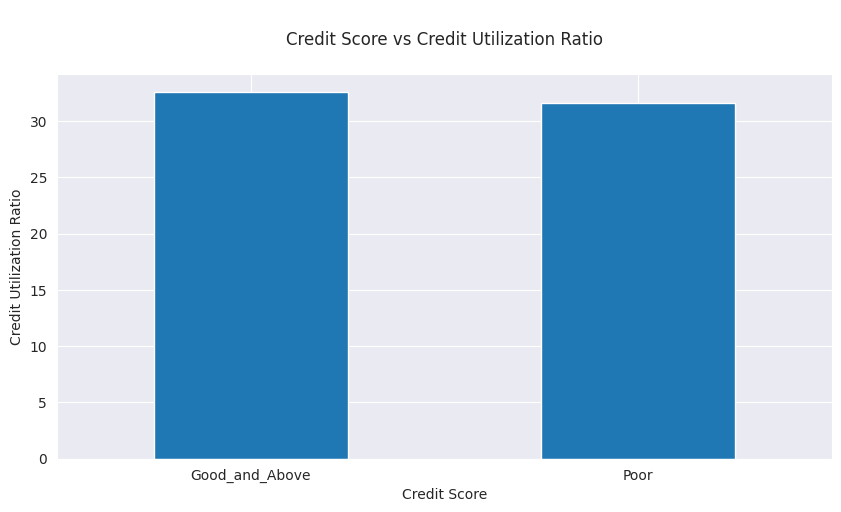

In [ ]:
plt.figure(figsize=[10,5])
original_testdata.groupby(['Credit_Score'])['Credit_Utilization_Ratio'].mean().plot.bar()
plt.title('\nCredit Score vs Credit Utilization Ratio\n')
plt.ylabel('Credit Utilization Ratio')
plt.xlabel('Credit Score')
plt.xticks(rotation = 360)
plt.show()

**Credit Score vs Payment of Min Amount**

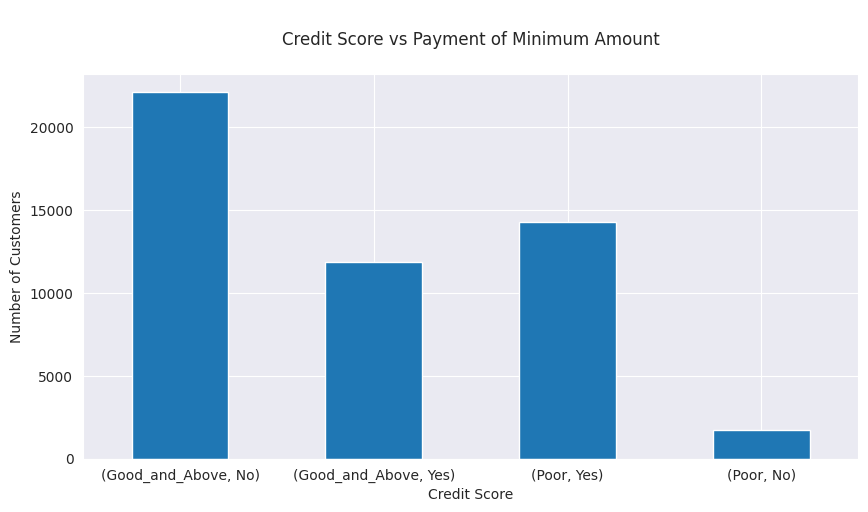

In [ ]:
plt.figure(figsize=[10,5])
original_testdata.groupby(['Credit_Score'])['Payment_of_Min_Amount'].value_counts().plot.bar()
plt.title('\nCredit Score vs Payment of Minimum Amount\n')
plt.ylabel('Number of Customers')
plt.xlabel('Credit Score')
plt.xticks(rotation = 360)
plt.show()

**Credit Score vs Total EMI per month**

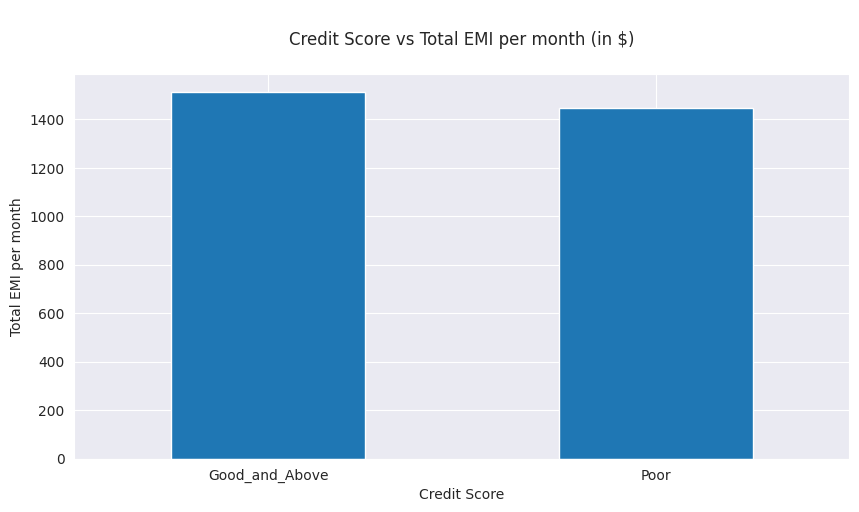

In [ ]:
plt.figure(figsize=[10,5])
original_testdata.groupby(['Credit_Score'])['Total_EMI_per_month'].mean().plot.bar()
plt.title('\nCredit Score vs Total EMI per month (in $)\n')
plt.ylabel('Total EMI per month')
plt.xlabel('Credit Score')
plt.xticks(rotation = 360)
plt.show()

**Credit Score vs Amount invested monthly**

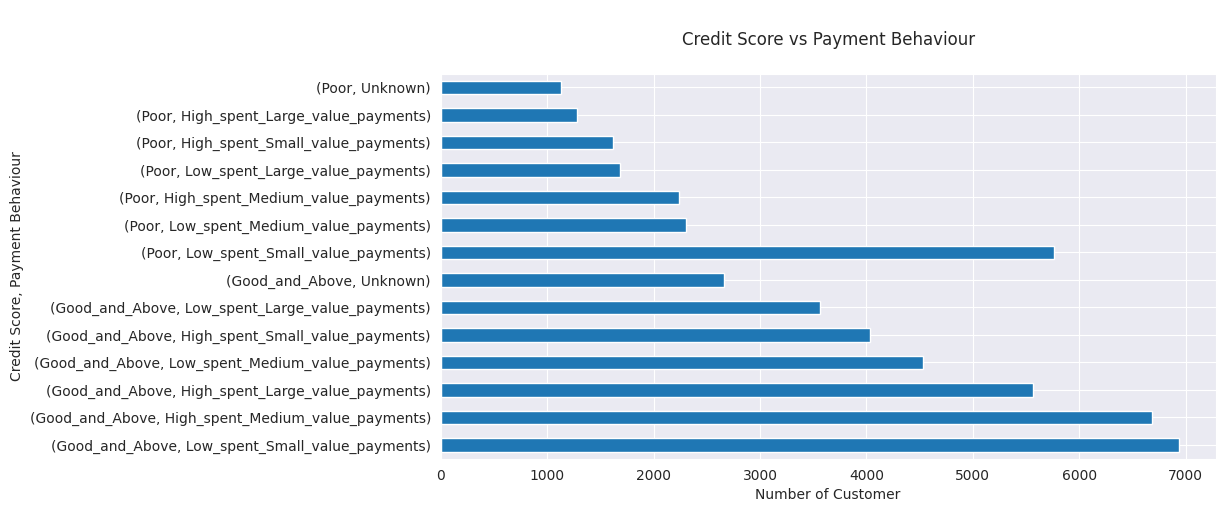

In [ ]:
plt.figure(figsize=[10,5])
original_testdata.groupby(['Credit_Score'])['Payment_Behaviour'].value_counts().plot.barh()
plt.title('\nCredit Score vs Payment Behaviour\n')
plt.ylabel('Credit Score, Payment Behaviour')
plt.xlabel('Number of Customer')
plt.show()

**Credit Score vs Monthly Balance**

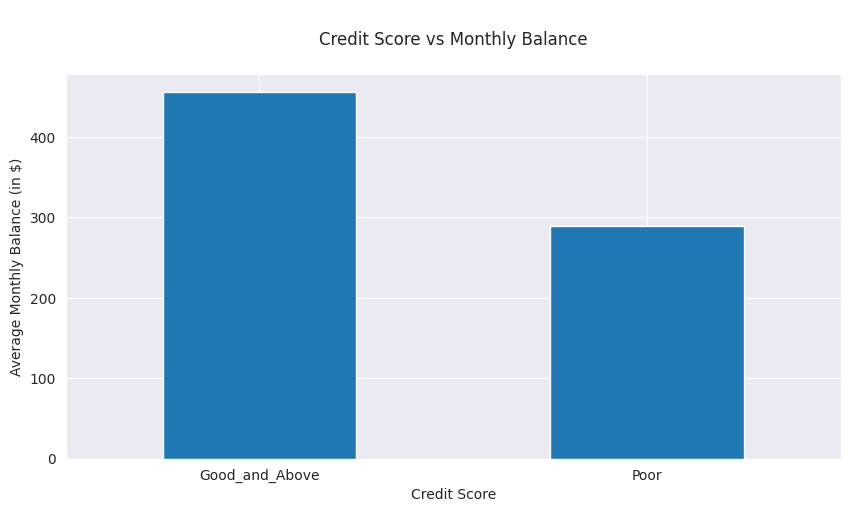

In [ ]:
plt.figure(figsize=[10,5])
original_testdata.groupby(['Credit_Score'])['Monthly_Balance'].mean().plot.bar()
plt.title('\nCredit Score vs Monthly Balance\n')
plt.ylabel('Average Monthly Balance (in $)')
plt.xlabel('Credit Score')
plt.xticks(rotation = 360)
plt.show()

## **Data of Customers with 'Poor' Credit Score**

In [ ]:
poor_cred_score_cust = original_testdata[original_testdata['Credit_Score']=='Poor']
poor_cred_score_cust.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
28,CUS_0x5407,30,Media_Manager,34081.380,2611.11500,30,14.0,Unknown,1704.18,38.477444,Yes,70.478333,315.366801,Low_spent_Small_value_payments,165.266367,Poor
52,CUS_0x6c66,39,Manager,8701.545,519.12875,24,9.0,Standard,2602.69,38.484852,Yes,36.548197,135.925682,High_spent_Small_value_payments,265.560010,Poor
53,CUS_0x6c66,39,Unknown,8701.545,519.12875,23,10.0,Standard,2602.69,25.380714,Yes,36.548197,37.646459,Low_spent_Small_value_payments,267.718219,Poor
54,CUS_0x6c66,40,Unknown,8701.545,3086.30500,23,9.0,Standard,2602.69,35.787191,Yes,36.548197,47.265179,Low_spent_Medium_value_payments,248.099498,Poor
55,CUS_0x6c66,40,Manager,8701.545,519.12875,23,14.0,Standard,2602.69,29.598239,Yes,36.548197,43.686661,Low_spent_Small_value_payments,261.678017,Poor


**Summary**

In [ ]:
poor_cred_score_cust.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,16019.000000,1.601900e+04,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000
mean,29.953992,1.572213e+05,2730.797384,36.645796,35.584681,2675.582311,31.606470,1446.570529,600.207220,288.756793
std,9.113281,1.423008e+06,1690.556121,13.881017,219.475431,1116.323561,4.949558,8476.513646,2074.037722,97.377429
min,14.000000,7.005930e+03,303.645417,1.000000,-2.000000,4.610000,20.509652,0.000000,0.000000,0.000000
25%,22.000000,1.545044e+04,1355.840000,25.000000,15.000000,1784.880000,27.418094,47.575623,63.420893,239.291722
50%,30.000000,2.062228e+04,2685.411667,34.000000,18.000000,2517.000000,31.657482,89.324004,114.070079,279.377700
75%,37.000000,5.028401e+04,3532.464167,48.000000,22.000000,3533.425000,35.778862,190.429435,191.306008,331.105077
max,95.000000,2.412183e+07,12156.080000,67.000000,4343.000000,4998.070000,44.206761,82248.000000,10000.000000,1211.599181


### **Average Characteristics of Customers having 'Poor' Credit Score**

1.   Age: 34 Years
2.   Average Annual Income: USD 150,000
3.   Average Monthly Inhand Salary: USD 2,700
4.   Average Delay from Due Date: 36 Days
5.   Average Number of Delayed Payments: 35 Days
6.   Average Outstanding Debt: USD 2,600
7.   Credit Utilization Ratio: 31
8.   Total EMI per month: USD 1,400
9.   Average Monthly Investment: USD 600
10.  Average Monthly Balance: USD 290 
11.  Credit Mix: Bad
12.  Payment Behaviour: Low Spent Small Value Payments

_____________________________________________________________________________